In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Загрузка данных
file_path = 'supermarket_sales - Sheet1.csv'
data = pd.read_csv(file_path)

In [4]:
# Предварительная очистка данных

# Проверка и удаление пропущенных значений
data.dropna(inplace=True)

# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Преобразование столбца 'Time' в формат времени
data['Time'] = pd.to_datetime(data['Time']).dt.time

# Кодирование категориальных переменных
label_encoders = {}
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

<ipython-input-4-e8f1b7f028de>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time']).dt.time


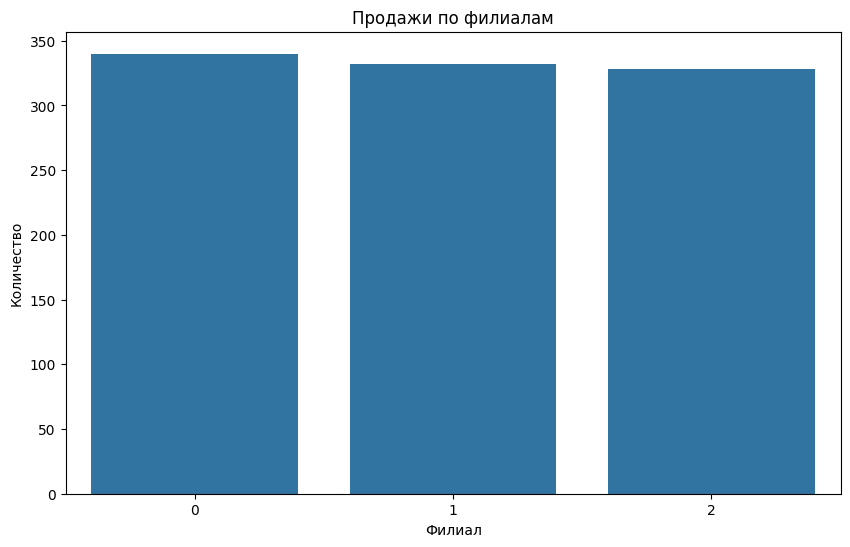

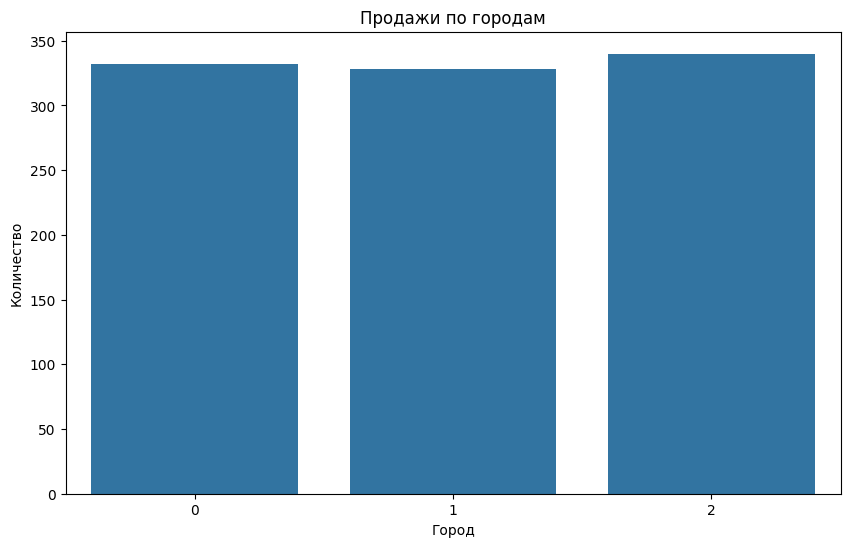

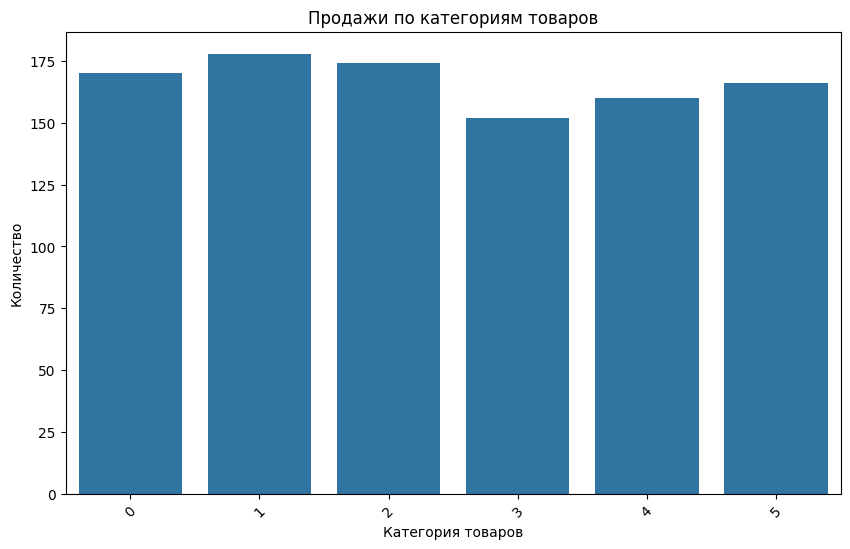

In [5]:
# Раздел 1: Основная статистика и визуализации

# Продажи по филиалам
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data=data)
plt.title('Продажи по филиалам')
plt.xlabel('Филиал')
plt.ylabel('Количество')
plt.show()

# Продажи по городам
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=data)
plt.title('Продажи по городам')
plt.xlabel('Город')
plt.ylabel('Количество')
plt.show()

# Продажи по категориям товаров
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', data=data)
plt.title('Продажи по категориям товаров')
plt.xlabel('Категория товаров')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

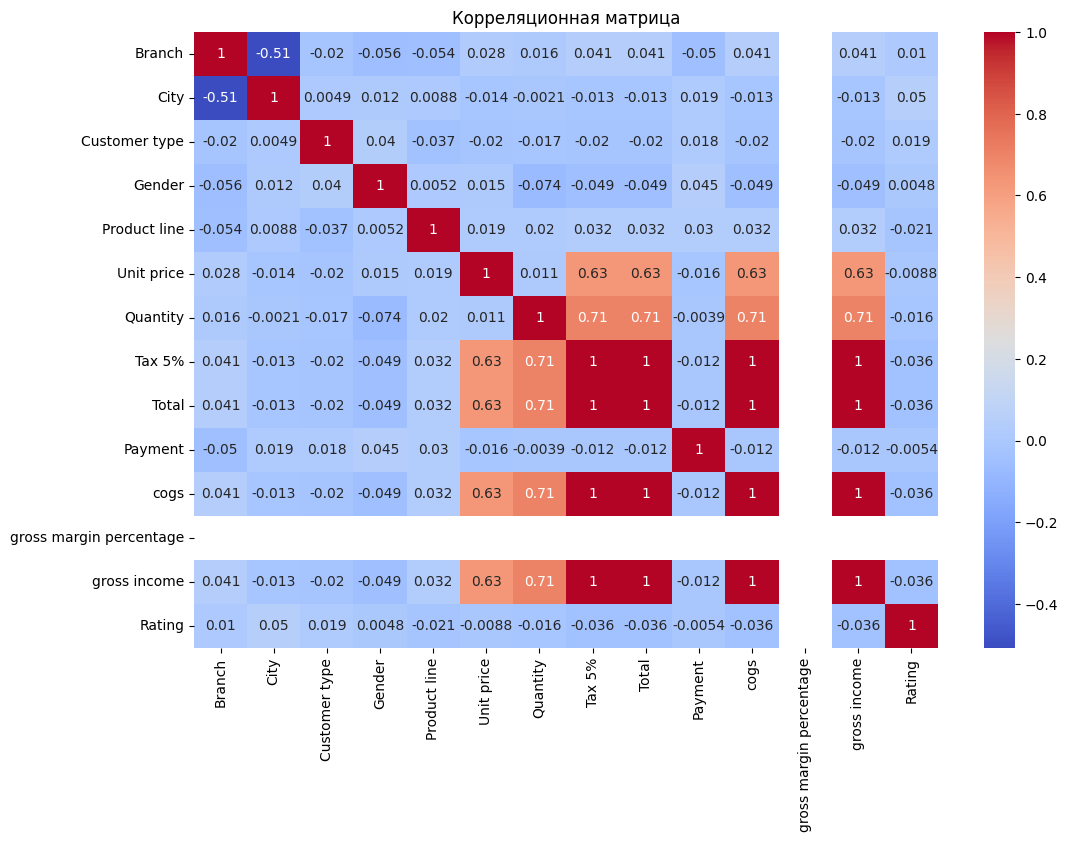

In [6]:
# Раздел 2: Корреляционный анализ

# Корреляционная матрица
plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


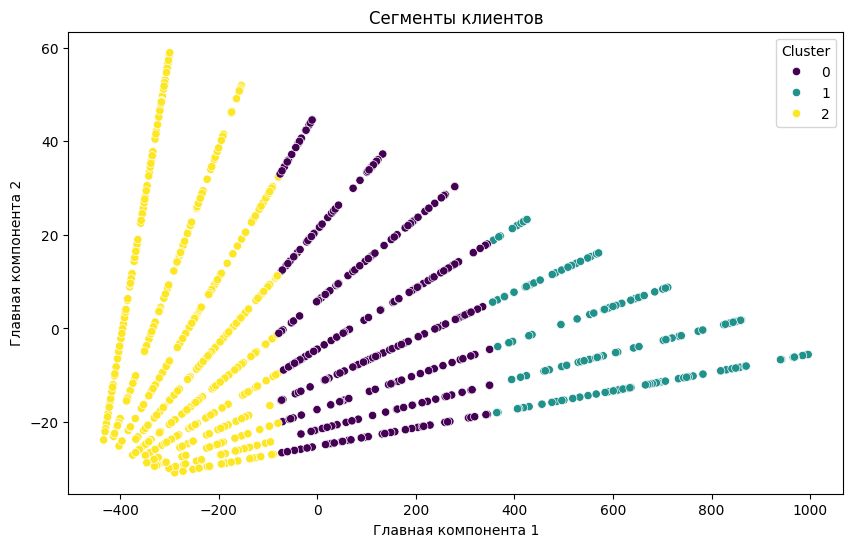

In [7]:
# Раздел 3: Кластерный анализ

# Подготовка данных для кластеризации
features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
X = data[features]

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Снижение размерности с использованием PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, palette='viridis')
plt.title('Сегменты клиентов')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Supermarket Sales Processed Data", dataframe=data)

# Сохранение обработанных данных в новый CSV файл
#data.to_csv('/mnt/data/supermarket_sales_processed.csv', index=False)